In [1]:
from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1
from ROOT import gStyle
from array import array
import math

c1 = TCanvas( 'c1', 'Simple Fitting Example', 200, 10, 700, 500 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

Welcome to JupyROOT 6.18/02


In [2]:
def generator_function(x,par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

par = array('d')
par.append(1.80)
par.append(-4.05)
par.append(0.40)
par.append(1.0000)

In [3]:
gStyle.SetOptFit(1)
m = 3 #Set the order of the polynomial
n = 15 #Set the number of data points
walk = array('d')
walk = [-1,1,-.5,.5,0,-1,1,-.5,.5,0,-1,1,-.5,.5,0]

In [4]:
x = array('d')
y = array('d')

In [5]:
for i in range(0,n):
    x.append(-4.0+8.0*i/n)
    y.append(generator_function(x[i],par)+0.5*walk[i])

Fit 1: 1.812278 11.000000 



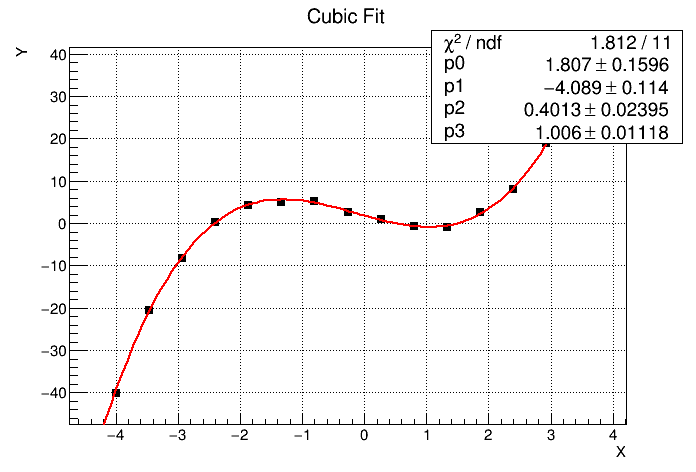

In [6]:
gr = TGraph(n,x,y)
pfit1 = TF1("pfit1","pol3")
gr.SetMarkerStyle(21)
gr.SetTitle("Cubic Fit")
gr.GetXaxis().SetTitle("X")
gr.GetYaxis().SetTitle("Y")
gr.Fit("pfit1","q")
pfit1chi2 = pfit1.GetChisquare()
pfit1ndf = pfit1.GetNDF()
pfit1chi2ndf = pfit1chi2/pfit1ndf
print("Fit 1: %f %f \n" % (pfit1chi2,pfit1ndf))
gr.Draw("AP")
c1.Draw()